In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sn

from sklearn import metrics

In [2]:
df_all = pd.read_csv('data.csv')

In [3]:
df_all.columns

Index(['TimeFrame', 'Fips', 'Location', 'Population', 'Rent', 'Rent_Burden',
       'Overcrowded', 'Owner', 'Employment_Ratio', 'Unemployment',
       'Median_Income', 'Uninsured_No', 'Uninsured_Pct', 'Education_Level',
       'Education_No', 'Education_Pct', 'Snap_No', 'Snap_Pct'],
      dtype='object')

In [4]:
# need complete cases

df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 910 entries, 0 to 909
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TimeFrame         910 non-null    int64  
 1   Fips              910 non-null    int64  
 2   Location          910 non-null    object 
 3   Population        910 non-null    float64
 4   Rent              910 non-null    float64
 5   Rent_Burden       910 non-null    float64
 6   Overcrowded       908 non-null    float64
 7   Owner             910 non-null    float64
 8   Employment_Ratio  907 non-null    float64
 9   Unemployment      907 non-null    float64
 10  Median_Income     910 non-null    float64
 11  Uninsured_No      715 non-null    float64
 12  Uninsured_Pct     715 non-null    float64
 13  Education_Level   845 non-null    object 
 14  Education_No      845 non-null    float64
 15  Education_Pct     845 non-null    float64
 16  Snap_No           520 non-null    float64
 1

In [5]:
# For our simplest model, without computing the percent change, we will use percents

df = df_all[['Population', 'Rent', 'Rent_Burden', 
             'Overcrowded', 'Owner', 
             'Employment_Ratio', 'Unemployment', 'Median_Income']]

df = df.dropna()

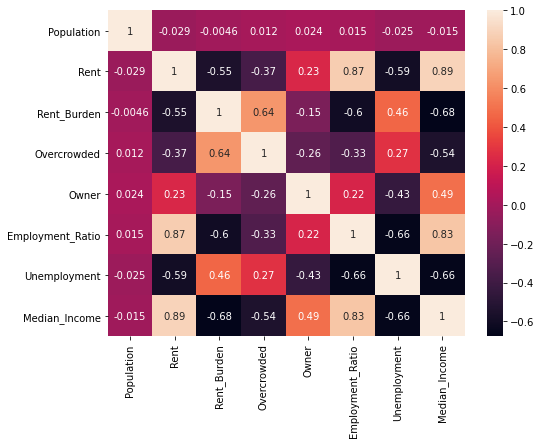

In [6]:
corrMatrix = df.corr()
plt.figure(figsize=(8,6))
sn.heatmap(corrMatrix, annot=True)
plt.show()

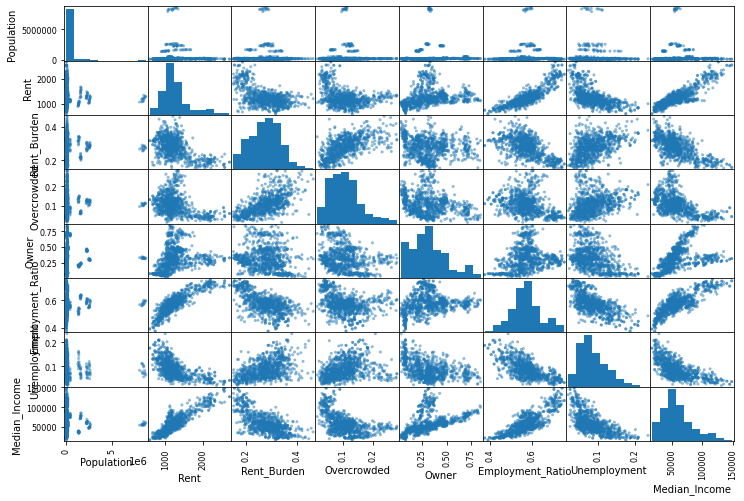

In [7]:
from pandas.plotting import scatter_matrix

# attributes = ['Rent', 'Rent_Burden', 'Median_Income', 'Employment_Ratio']

scatter_matrix(df, figsize=(12,8))

plt.show()

### Model 1: Variables without Scaling/Normalization

In [8]:
# predictors
X = df[['Rent', 'Rent_Burden', 'Overcrowded', 'Owner', 'Employment_Ratio']]

# 'Population' and 'Unemployment' are not statistically signficant

# target
y = df['Median_Income'].values.reshape(-1, 1)

y.shape

(905, 1)

In [9]:
# Split into training and testing : 70/30 split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(X_train.shape)
print(X_test.shape)

(633, 5)
(272, 5)


In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [11]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.936101122345769
Testing Score: 0.9450771382975323


Text(0.5, 1.0, 'Residual Plot')

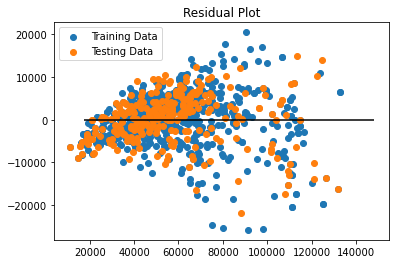

In [12]:
# Plot the Residuals for the Training and Testing data
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, label = "Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, label = "Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [13]:
predictions = model.predict(X_test)
print(f"True output: {y_test[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

True output: [32851.93098]
Predicted output: [31547.31019778]
Prediction Error: [-85156.18410222]


In [14]:
import statsmodels.api as sm

sm.OLS(y_train, X_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                          1.281e+04
Date:                Mon, 20 Jul 2020   Prob (F-statistic):                        0.00
Time:                        20:46:56   Log-Likelihood:                         -6450.9
No. Observations:                 633   AIC:                                  1.291e+04
Df Residuals:                     628   BIC:                                  1.293e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Rent                40.7127      1.254     32.474      0.000      38.251      43.175
Rent_Burden      -7.778e+04   4820.468    -16.134      0.000   -8.72e+04   -6.83e+04
Overcrowded      -5.135e+04   6701.996     -7.662      0.000   -6.45e+04   -3.82e+04
Owner              3.84e+04   1438.364     26.695      0.000    3.56e+04    4.12e+04
Employment_Ratio  4.001e+04   4110.480      9.734      0.000    3.19e+04    4.81e+04
==============================================================================
Omnibus:                       68.407   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.893
Skew:                           0.658   Prob(JB):                     3.78e-29
Kurtosis:                       4.797   Cond. No.                     3.91e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.91e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model 2: Univariate Linear Regression

In [15]:
# predictors
X = df[['Rent']]

# target
y = df['Median_Income'].values.reshape(-1, 1)

y.shape

(905, 1)

In [16]:
# Split into training and testing : 70/30 split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(X_train.shape)
print(X_test.shape)

(633, 1)
(272, 1)


In [17]:
model = LinearRegression()

In [18]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.7867851531033794
Testing Score: 0.8241892500911914


Text(0.5, 1.0, 'Residual Plot')

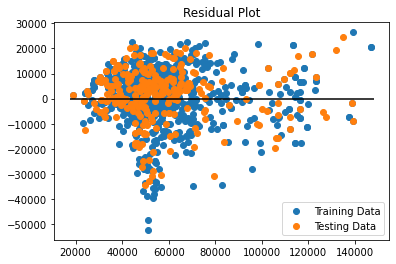

In [19]:
# Plot the Residuals for the Training and Testing data
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

### Model 3: Variables with Scaling

In [20]:
# predictors
X = df[['Population', 'Rent', 'Rent_Burden', 
             'Overcrowded', 'Owner', 
             'Employment_Ratio', 'Unemployment']]

# target
y = df['Median_Income'].values.reshape(-1, 1)

y.shape

(905, 1)

In [21]:
# Split into training and testing : 70/30 split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(X_train.shape)
print(X_test.shape)

(633, 7)
(272, 7)


In [22]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [23]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [24]:
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train_scaled)

training_score_scaled = model_scaled.score(X_train_scaled, y_train_scaled)
testing_score_scaled = model_scaled.score(X_test_scaled, y_test_scaled)

print(f"Training Score: {training_score_scaled}")
print(f"Testing Score: {testing_score_scaled}")

Training Score: 0.9361233224565995
Testing Score: 0.9450722554026325


## Feature Engineering: Percent Change (from Previous Year)

In [25]:
df_pct = pd.read_csv('data_pct_change.csv')

In [26]:
df_pct.columns

Index(['TimeFrame', 'Fips', 'Location', 'Population', 'Rent', 'Rent_Burden',
       'Overcrowded', 'Owner', 'Employment_Ratio', 'Unemployment',
       'Median_Income', 'Uninsured_No', 'Uninsured_Pct', 'Education_Level',
       'Education_No', 'Education_Pct', 'Snap_No', 'Snap_Pct',
       'Population_change', 'Rent_change', 'Rent_Burden_change',
       'Overcrowded_change', 'Owner_change', 'Employment_Ratio_change',
       'Unemployment_change', 'Median_Income_change', 'Uninsured_change',
       'Education_change'],
      dtype='object')

In [27]:
df_pct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 910 entries, 0 to 909
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TimeFrame                910 non-null    int64  
 1   Fips                     910 non-null    int64  
 2   Location                 910 non-null    object 
 3   Population               910 non-null    float64
 4   Rent                     910 non-null    float64
 5   Rent_Burden              910 non-null    float64
 6   Overcrowded              908 non-null    float64
 7   Owner                    910 non-null    float64
 8   Employment_Ratio         907 non-null    float64
 9   Unemployment             907 non-null    float64
 10  Median_Income            910 non-null    float64
 11  Uninsured_No             715 non-null    float64
 12  Uninsured_Pct            715 non-null    float64
 13  Education_Level          845 non-null    object 
 14  Education_No             8

In [31]:
# For our simplest model, without computing the percent change, we will use percents

df = df_pct[['Median_Income',
       'Population_change', 'Rent_change', 'Rent_Burden_change',
       'Overcrowded_change', 'Owner_change', 'Employment_Ratio_change',
       'Unemployment_change', 'Uninsured_change',
       'Education_change']]

df = df.dropna()

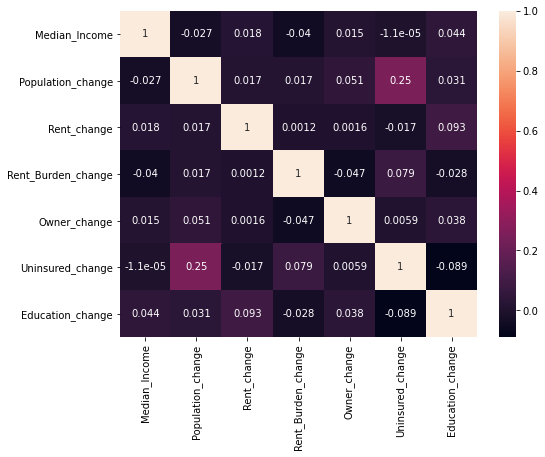

In [32]:
corrMatrix = df.corr()
plt.figure(figsize=(8,6))
sn.heatmap(corrMatrix, annot=True)
plt.show()

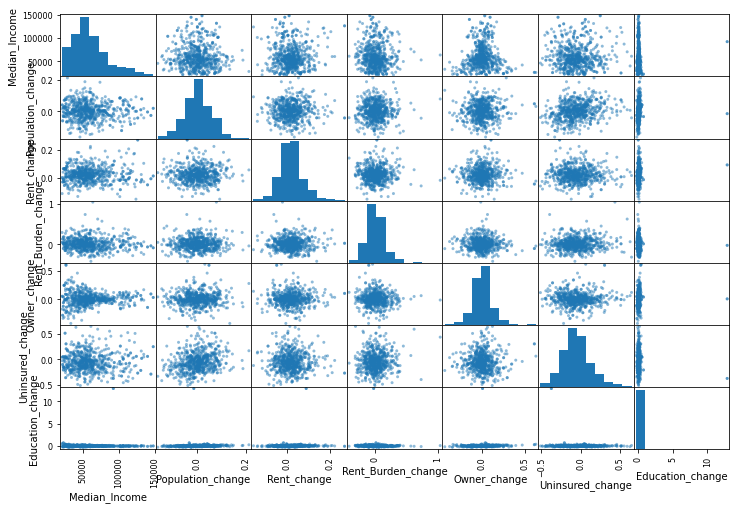

In [33]:
scatter_matrix(df, figsize=(12,8))

plt.show()